<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/ML_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

Decision tree model can be used to predict both classification and regression outcomes. 

##  Classification with decision tree 



## 1. Import libraries and dataset 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df_class = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

In [31]:
df_class.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## 2. Missing values and EDA

Skip. It has been done within `Unit_4_predict_ad_click.ipynb`.

## 3. Data wrangling

remove all non-numeric variable.

In [32]:
df_class.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1,inplace=True)

## 4. Buid decision trees

In [33]:
# split data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_class.drop('Clicked on Ad', axis=1), df_class['Clicked on Ad'], test_size=0.30, random_state=101)
# build decision trees
from sklearn.tree import DecisionTreeClassifier # import library
classifier = DecisionTreeClassifier() # set up model
classifier.fit(x_train, y_train) # model fitting
y_pred = classifier.predict(x_test) # make predictions

# 5. Evaluate model

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[148   9]
 [  9 134]]


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       157
           1       0.94      0.94      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Compare to the scores we get with logistic regression, we have higher scores when using decision tree model.

# Regression with decision trees



## 1. import dataset

I'll use Boston Housing Dataset from seanborn package and build a decision trees model to prediction the price

In [36]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
# append Price, target, as a new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [37]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Missing values and EDA

Skip. It has been done within `ML_Linear_Regression_Guided_Project.ipynb`.


## 3. Build decision trees 

In [38]:
# split data
x_train,x_test,y_train,y_test = train_test_split(df_boston.drop('Price', axis=1), df_boston['Price'], test_size=0.30, random_state=101)

In [39]:
# build model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
# predict
y_pred = regressor.predict(x_test)

## 4. Evaluate mdoel

In [47]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squred score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.3874999999999997
Mean Squared Error: 21.24453947368421
Root Mean Squared Error: 4.609179913355977
R-squred score:  0.7859711288156191


Plot predicted vs true values

In [48]:
df.head()

,Actual,Predicted
195,50.0,48.5
4,36.2,33.4
434,11.7,9.6
458,14.9,13.5
39,30.8,27.9


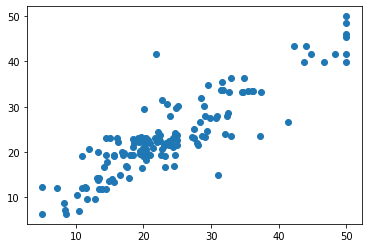

In [49]:
plt.scatter(y_test,y_pred)
plt.show()

Recall that the R-squared score was 0.69 when using linear regression. With decision tree, the R-squared score was 0.78. We can confirm this with the plot above. Therefore, decision trees model works better when prediction boston housing price.